In [1]:
# Ignore caches to import module
%load_ext autoreload
%autoreload 2

In [2]:
import os
import keras
from keras.layers import Conv2D, AvgPool2D, Activation, Flatten, Input
from keras.models import Model
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from kerasmodel_io import read_kerasmodel

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., np.newaxis]
x_train = x_train / 127.5 - 1.
x_train = np.pad(x_train,((0,0),(2,2),(2,2),(0,0)), 'constant', constant_values = (-1.,))

x_test = x_test[..., np.newaxis]
x_test = x_test / 127.5 - 1.
x_test = np.pad(x_test,((0,0),(2,2),(2,2),(0,0)), 'constant', constant_values = (-1.,))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tensorlog_dir = './logs/tensorboard'
if tf.gfile.Exists(tensorlog_dir):
    tf.gfile.DeleteRecursively(tensorlog_dir)

In [4]:
model = load_model('../models/lrp_demo_mnist.h5')
loss, acc = model.evaluate(x_test, y_test)
print("loss:", loss)
print("acc:", acc)

10000/10000 [==============================] - 1s 146us/step
('loss:', 0.49655898132324217)
('acc:', 0.7925)


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 10)        260       
_________________________________________________________________
pool1 (AveragePooling2D)     (None, 14, 14, 10)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 25)        6275      
_________________________________________________________________
pool2 (AveragePooling2D)     (None, 5, 5, 25)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 2, 2, 100)         40100     
_________________________________________________________________
pool3 (AveragePooling2D)     (None, 1, 1, 100)         0         
__________

In [6]:
nn = read_kerasmodel(model)
nn.modules

In [7]:
acc_lrp_model = nn.evaluate(x_test, y_test)
print("acc of lrp model:", acc_lrp_model)

('acc of lrp model:', 0.7926)


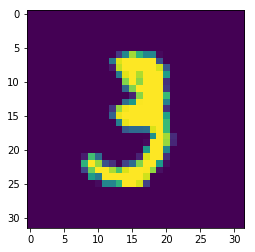

In [8]:
n = 10
x = x_train[n]
y = y_train[n]

plt.imshow(x[...,0])
plt.show()

In [9]:
ypred = nn.forward(x[np.newaxis,...])

In [10]:
labels = np.arange(10)

[0 1 2 3 4 5 6 7 8 9]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


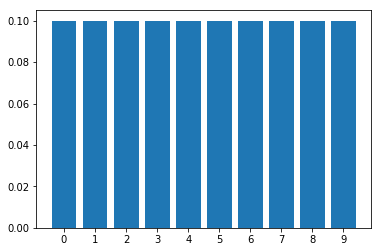

In [11]:
ypred = nn.forward(x[np.newaxis,...])
print(labels)
print(ypred[0])
fig, ax = plt.subplots()
ax.bar(labels, ypred[0])
ax.xaxis.set_ticks(labels)
plt.show()

In [12]:
print("Label:", np.argmax(y))
print("Prediction:", np.argmax(ypred))

('Label:', 3)
('Prediction:', 0)


In [13]:
R = nn.lrp(ypred, 'epsilon', 1)

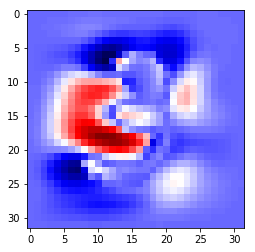

In [14]:
plt.imshow(R[0,...,0], cmap='seismic')
plt.show()